In [ ]:
import pickle
import numpy as np
from matplotlib import pyplot as plt


# List of parameters used:
# n - Number of functions whose average is target objective F.
# k - Total number of epochs.
# G - Gradient bound as defined in Assumptions 1 & 2.
# lam - Strong convexity parameter of the objective function
# lam_max - Gradient Lipschitz bound of the objective F which is equivalent to the largest eigenvalue of the matrix A
# setup - A parameter specifying the construction of F used, which is either Eq. (1) in the paper (setup='ss') or
# Eq. (2) (setup='rr').

In [ ]:
# Run with-replacement SGD with given parameters on the problem defined in Eq. (1) in the paper (setup='ss') or on the
# problem in Eq. (2) (setup='rr').
def with_replacement(n, k, G, lam, lam_max, setup='ss'):
    eta = np.log(n * k) / (lam * n * k)  # Choose step size according to Theorems 3 & 4 in the paper.
    x1 = -G/lam * 0.5
    x2 = -G/lam_max * 0.5
    for t in range(k):
        for i in range(n):
            x1 = (1 - eta * lam) * x1
            random_bit = np.random.randint(0, 2)  # Choose a bit uniformly at random to choose step type.
            if setup == 'ss':
                x2 = (1 - eta * lam_max) * x2 + eta * G / 2 * (random_bit * 2 - 1)
            else:
                x2 = (1 - eta * lam_max * random_bit) * x2 + eta * G / 2 * (random_bit * 2 - 1)
    # Compute and return loss according to function definition
    if setup == 'ss':
        return lam / 2 * x1 ** 2 + lam_max / 2 * x2 ** 2
    else:
        return lam / 2 * x1 ** 2 + lam_max / 4 * x2 ** 2

In [ ]:
# Run without-replacement SGD using single shuffling sampling where a permutation of the functions is selected and then
# used repeatedly throughout all epochs. The algorithm uses the given parameters on the problem defined in Eq. (1) in
# the paper (setup='ss') or on the problem in Eq. (2) (setup='rr').
def SS(n, k, G, lam, lam_max, setup='ss'):
    elements = np.random.permutation(np.append(np.ones(np.floor_divide(n, 2)), -np.ones(np.floor_divide(n, 2))))
    # elements now stores a random permutation of n/2 -1's and n/2 1's, selected uniformly at random.
    eta = np.log(n*k)/(lam * n * k)  # Choose step size according to Theorems 3 & 4 in the paper.
    x1 = -G/lam * 0.5
    x2 = -G/lam_max * 0.5
    # Initialize from a point (x1, x2) satisfying the initialization condition in Assumptions 1 & 2.
    for t in range(k):
        for i in range(n):
            x1 = (1 - eta * lam) * x1
            if setup == 'ss':
                x2 = (1 - eta * lam_max) * x2 + eta * G / 2 * elements[i]
            else:
                x2 = (1 - eta * lam_max * (-0.5 * elements[i] + 0.5)) * x2 + eta * G / 2 * elements[i]
        # Compute and return loss according to function definition
    if setup == 'ss':
        return lam / 2 * x1 ** 2 + lam_max / 2 * x2 ** 2
    else:
        return lam / 2 * x1 ** 2 + lam_max / 4 * x2 ** 2


In [ ]:
# Run without-replacement SGD using random reshuffling sampling where a fresh permutation of the functions is selected
# at the start of each epoch. The algorithm uses the given parameters on the problem defined in Eq. (1) in the paper
# (setup='ss') or on the problem in Eq. (2) (setup='rr').
def RR(n, k, G, lam, lam_max, setup='rr'):
    elements = np.append(np.ones(np.floor_divide(n, 2)), -np.ones(np.floor_divide(n, 2)))
    # elements stores an array of n/2 1's followed by n/2 -1's.
    eta = np.log(n*k)/(lam * n * k)
    x1 = -G/lam * 0.5
    x2 = -G/lam_max * 0.5
    for t in range(k):
        elements = np.random.permutation(elements)
        # elements now stores a fresh random permutation of -1's and 1's, selected uniformly at random.
        for i in range(n):
            x1 = (1 - eta * lam) * x1
            if setup == 'ss':
                x2 = (1 - eta * lam_max) * x2 + eta * G / 2 * elements[i]
            else:
                x2 = (1 - eta * lam_max * (-0.5 * elements[i] + 0.5)) * x2 + eta * G / 2 * elements[i]
    # Compute and return loss according to function definition
    if setup == 'ss':
        return lam / 2 * x1 ** 2 + lam_max / 2 * x2 ** 2
    else:
        return lam / 2 * x1 ** 2 + lam_max / 4 * x2 ** 2


In [ ]:
# Run without-replacement SGD using deterministic cyclic sampling where a fixed order of the functions is selected
# and reused for all epochs without reshuffling. The algorithm uses the given parameters on the problem defined in
# Eq. (1) in the paper (setup='ss') or on the problem in Eq. (2) (setup='rr').
def cyclic_SGD(n, k, G, lam, lam_max, setup='rr'):
    elements = np.append(np.ones(np.floor_divide(n, 2)), -np.ones(np.floor_divide(n, 2)))
    # elements stores an array of n/2 1's followed by n/2 -1's.

    eta = np.log(n * k) / (lam * n * k)  # Choose step size according to Theorems 3 & 4 in the paper.

    x1 = -G / lam * 0.5
    x2 = -G / lam_max * 0.5
    # Initialize from a point (x1, x2) satisfying the initialization condition in Assumptions 1 & 2.

    for t in range(k):
        # elements is used in a fixed deterministic order, no reshuffling across epochs
        for i in range(n):
            x1 = (1 - eta * lam) * x1
            if setup == 'ss':
                x2 = (1 - eta * lam_max) * x2 + eta * G / 2 * elements[i]
            else:
                x2 = (1 - eta * lam_max * (-0.5 * elements[i] + 0.5)) * x2 + eta * G / 2 * elements[i]

    # Compute and return loss according to function definition
    if setup == 'ss':
        return lam / 2 * x1 ** 2 + lam_max / 2 * x2 ** 2
    else:
        return lam / 2 * x1 ** 2 + lam_max / 4 * x2 ** 2


In [ ]:
# Run Mini-batch SGD using sampling with replacement. Each mini-batch is selected randomly with replacement.
# The algorithm uses the given parameters on the problem defined in Eq. (1) in the paper (setup='ss') or
# on the problem in Eq. (2) (setup='rr').
def mini_batch_SGD(n, k, G, lam, lam_max, batch_size, setup='ss'):
    eta = np.log(n * k) / (lam * n * k)  # Choose step size according to Theorems 3 & 4 in the paper.

    x1 = -G / lam * 0.5
    x2 = -G / lam_max * 0.5
    # Initialize from a point (x1, x2) satisfying the initialization condition in Assumptions 1 & 2.

    for t in range(k):
        for _ in range(n // batch_size):
            # Sample a mini-batch of 'batch_size' elements with replacement
            mini_batch = np.random.choice([-1, 1], size=batch_size)

            # Perform the update using the average of the mini-batch elements
            avg_element = np.mean(mini_batch)

            x1 = (1 - eta * lam) * x1
            if setup == 'ss':
                x2 = (1 - eta * lam_max) * x2 + eta * G / 2 * avg_element
            else:
                x2 = (1 - eta * lam_max * (-0.5 * avg_element + 0.5)) * x2 + eta * G / 2 * avg_element

    # Compute and return loss according to function definition
    if setup == 'ss':
        return lam / 2 * x1 ** 2 + lam_max / 2 * x2 ** 2
    else:
        return lam / 2 * x1 ** 2 + lam_max / 4 * x2 ** 2


In [ ]:
# Run 'times'-many instantiations of SGD for all three sampling methods, and average over the results. Stores the
# results in a pickled file for each value of k and construction type (E.g. Eq. (1) or Eq. (2) in the paper).
def run_experiment(times, n, ks, G, lam, lam_max, setup='ss'):
    for i in range(len(ks)):
        try:
            result = pickle.load(open(setup + " k=" + str(ks[i]) + ".p", "rb"))
            print("Loaded file '" + str(setup) + " k=" + str(ks[i]) + ".p' containing " + str(len(result[0])) + " instantiations of SGD")
        except (OSError, IOError) as e:
            result = [np.array([]), np.array([]), np.array([])]
            pickle.dump(result, open(str(setup) + " k=" + str(ks[i]) + ".p", "wb"))
            print("Created file '" + str(setup) + " k=" + str(ks[i]) + ".p'")
    for t in range(times):
        print_flag = False
        for i in range(len(ks)):
            result = pickle.load(open(setup + " k=" + str(ks[i]) + ".p", "rb"))
            if len(result[0]) <= t:
                print_flag = True
                result[0] = np.append(result[0], with_replacement(n, ks[i], G, lam, lam_max, setup))
                result[1] = np.append(result[1], SS(n, ks[i], G, lam, lam_max, setup))
                result[2] = np.append(result[2], RR(n, ks[i], G, lam, lam_max, setup))
                pickle.dump(result, open(str(setup) + " k=" + str(ks[i]) + ".p", "wb"))
        if print_flag:
            print('Computed ' + str(t + 1) + ' instantiations of SGD')


In [ ]:
# Extract the results of the given values of k and problem setup (E.g. Eq. (1) or Eq. (2) in the paper) and stores the
# results in an array
def get_results(ks, setup):
    wr = np.zeros((len(ks),))
    ss = np.zeros((len(ks),))
    rr = np.zeros((len(ks),))
    wr_ci = np.zeros((len(ks),))
    ss_ci = np.zeros((len(ks),))
    rr_ci = np.zeros((len(ks),))
    for i in range(len(ks)):
        try:
            result = pickle.load(open(setup + " k=" + str(ks[i]) + ".p", "rb"))
        except (OSError, IOError) as e:
            print("Could not open file '" + setup + " k=" + str(ks[i]) + ".p'. File may not exist")
            return 1
        wr[i] = np.mean(np.log10(result[0]))
        ss[i] = np.mean(np.log10(result[1]))
        rr[i] = np.mean(np.log10(result[2]))
        wr_ci[i] = np.std(np.log10(result[0]))
        ss_ci[i] = np.std(np.log10(result[1]))
        rr_ci[i] = np.std(np.log10(result[2]))
    return wr, ss, rr, wr_ci, ss_ci, rr_ci
    # Returns the average loss for with-replacement (wr), single shuffling (ss) and random reshuffling (rr).

In [ ]:

# Plots the graph given in Figure 1 in the paper
def plot_graph(ks):
    fig, axs = plt.subplots(2, 1)

    [wr, ss, rr, wr_ci, ss_ci, rr_ci] = get_results(ks, setup='ss')
    axs[0].plot(ks, wr, 'bo', label='With-replacement')
    axs[0].fill_between(ks, (wr - wr_ci), (wr + wr_ci), color='b', alpha=.1)
    axs[0].plot(ks, ss, 'r+', label='Single Shuffling', markersize=7, markeredgewidth=2)
    axs[0].fill_between(ks, (ss - ss_ci), (ss + ss_ci), color='r', alpha=.1)
    axs[0].plot(ks, rr, 'gv', label='Random Reshuffling')
    axs[0].fill_between(ks, (rr - rr_ci), (rr + rr_ci), color='g', alpha=.1)
    axs[0].set_ylabel("Mean Log-Loss", fontsize=16)
    axs[0].legend()
    axs[0].set_yscale('linear')
    axs[0].set_xscale('log')

    [wr, ss, rr, wr_ci, ss_ci, rr_ci] = get_results(ks, setup='rr')
    axs[1].plot(ks, wr, 'bo', label='With-replacement')
    axs[1].fill_between(ks, (wr - wr_ci), (wr + wr_ci), color='b', alpha=.1)
    axs[1].plot(ks, ss, 'r+', label='Single Shuffling', markersize=7, markeredgewidth=2)
    axs[1].fill_between(ks, (ss - ss_ci), (ss + ss_ci), color='r', alpha=.1)
    axs[1].plot(ks, rr, 'gv', label='Random Reshuffling')
    axs[1].fill_between(ks, (rr - rr_ci), (rr + rr_ci), color='g', alpha=.1)
    axs[1].set_ylabel("Mean Log-Loss", fontsize=16)
    axs[1].set_xlabel("k", fontsize=16)
    axs[1].legend()
    axs[1].set_yscale('linear')
    axs[1].set_xscale('log')

    fig.set_size_inches(9, 9)
    plt.show(fig)

In [ ]:
# Runs the experiment setup as described in the paper in Sec. 5. The values of k below were chosen so that the graph has
# roughly equal density when the x axis is presented in log scale. To quickly run an experiment, change the value of
# 'times' which controls the number of SGD instantiations to average over, to a smaller number.

k_values = np.append(np.append(np.append(np.append(np.append(range(40, 49, 2), range(50, 121, 4)), range(120, 251, 10)),
                                         range(250, 501, 20)), range(500, 1001, 40)), range(1000, 2001, 80))
run_experiment(times=1, n=500, ks=k_values, G=1, lam=1, lam_max=200, setup='ss')
run_experiment(times=1, n=500, ks=k_values, G=1, lam=1, lam_max=200, setup='rr')
plot_graph(ks=k_values)

Created file 'ss k=40.p'
Created file 'ss k=42.p'
Created file 'ss k=44.p'
Created file 'ss k=46.p'
Created file 'ss k=48.p'
Created file 'ss k=50.p'
Created file 'ss k=54.p'
Created file 'ss k=58.p'
Created file 'ss k=62.p'
Created file 'ss k=66.p'
Created file 'ss k=70.p'
Created file 'ss k=74.p'
Created file 'ss k=78.p'
Created file 'ss k=82.p'
Created file 'ss k=86.p'
Created file 'ss k=90.p'
Created file 'ss k=94.p'
Created file 'ss k=98.p'
Created file 'ss k=102.p'
Created file 'ss k=106.p'
Created file 'ss k=110.p'
Created file 'ss k=114.p'
Created file 'ss k=118.p'
Created file 'ss k=120.p'
Created file 'ss k=130.p'
Created file 'ss k=140.p'
Created file 'ss k=150.p'
Created file 'ss k=160.p'
Created file 'ss k=170.p'
Created file 'ss k=180.p'
Created file 'ss k=190.p'
Created file 'ss k=200.p'
Created file 'ss k=210.p'
Created file 'ss k=220.p'
Created file 'ss k=230.p'
Created file 'ss k=240.p'
Created file 'ss k=250.p'
Loaded file 'ss k=250.p' containing 0 instantiations of 

KeyboardInterrupt: 

Loaded file 'ss k=40.p' containing 1 instantiations of SGD
Loaded file 'ss k=42.p' containing 1 instantiations of SGD
Loaded file 'ss k=44.p' containing 1 instantiations of SGD
Loaded file 'ss k=46.p' containing 1 instantiations of SGD
Loaded file 'ss k=48.p' containing 1 instantiations of SGD
Loaded file 'ss k=50.p' containing 1 instantiations of SGD
Loaded file 'ss k=54.p' containing 1 instantiations of SGD
Loaded file 'ss k=58.p' containing 1 instantiations of SGD
Loaded file 'ss k=62.p' containing 1 instantiations of SGD
Loaded file 'ss k=66.p' containing 1 instantiations of SGD
Loaded file 'ss k=70.p' containing 1 instantiations of SGD
Loaded file 'ss k=74.p' containing 1 instantiations of SGD
Loaded file 'ss k=78.p' containing 1 instantiations of SGD
Loaded file 'ss k=82.p' containing 1 instantiations of SGD
Loaded file 'ss k=86.p' containing 1 instantiations of SGD
Loaded file 'ss k=90.p' containing 1 instantiations of SGD
Loaded file 'ss k=94.p' containing 1 instantiations of S

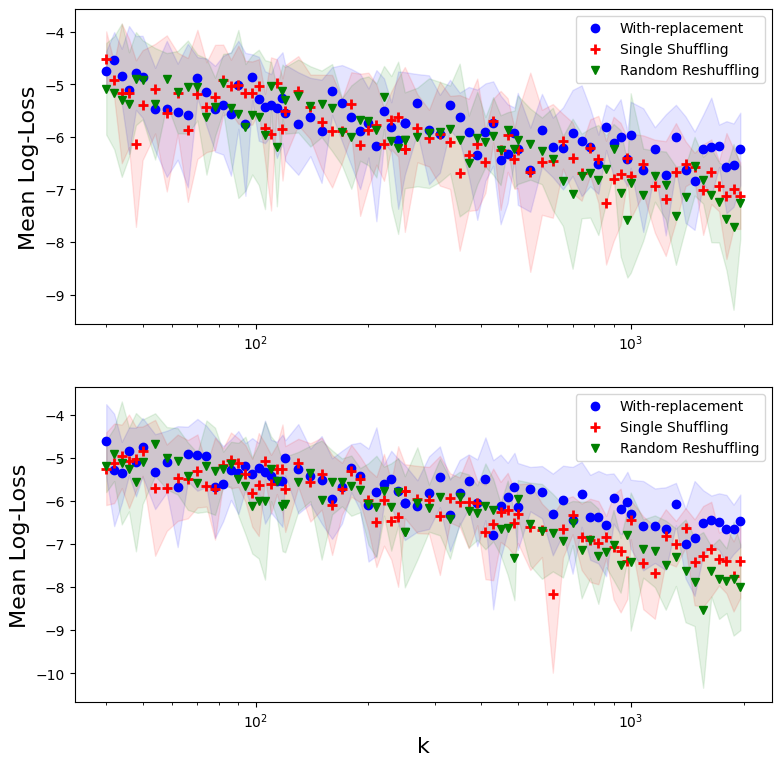

In [ ]:
# Runs the experiment setup as described in the paper in Sec. 5. The values of k below were chosen so that the graph has
# roughly equal density when the x axis is presented in log scale. To quickly run an experiment, change the value of
# 'times' which controls the number of SGD instantiations to average over, to a smaller number.

k_values = np.append(np.append(np.append(np.append(np.append(range(40, 49, 2), range(50, 121, 4)), range(120, 251, 10)),
                                         range(250, 501, 20)), range(500, 1001, 40)), range(1000, 2001, 80))
run_experiment(times=10, n=500, ks=k_values, G=1, lam=1, lam_max=200, setup='ss')
run_experiment(times=10, n=500, ks=k_values, G=1, lam=1, lam_max=200, setup='rr')
plot_graph(ks=k_values)

Loaded file 'ss k=40.p' containing 10 instantiations of SGD
Loaded file 'ss k=42.p' containing 10 instantiations of SGD
Loaded file 'ss k=44.p' containing 10 instantiations of SGD
Loaded file 'ss k=46.p' containing 10 instantiations of SGD
Loaded file 'ss k=48.p' containing 10 instantiations of SGD
Loaded file 'ss k=50.p' containing 10 instantiations of SGD
Loaded file 'ss k=54.p' containing 10 instantiations of SGD
Loaded file 'ss k=58.p' containing 10 instantiations of SGD
Loaded file 'ss k=62.p' containing 10 instantiations of SGD
Loaded file 'ss k=66.p' containing 10 instantiations of SGD
Loaded file 'ss k=70.p' containing 10 instantiations of SGD
Loaded file 'ss k=74.p' containing 10 instantiations of SGD
Loaded file 'ss k=78.p' containing 10 instantiations of SGD
Loaded file 'ss k=82.p' containing 10 instantiations of SGD
Loaded file 'ss k=86.p' containing 10 instantiations of SGD
Loaded file 'ss k=90.p' containing 10 instantiations of SGD
Loaded file 'ss k=94.p' containing 10 in

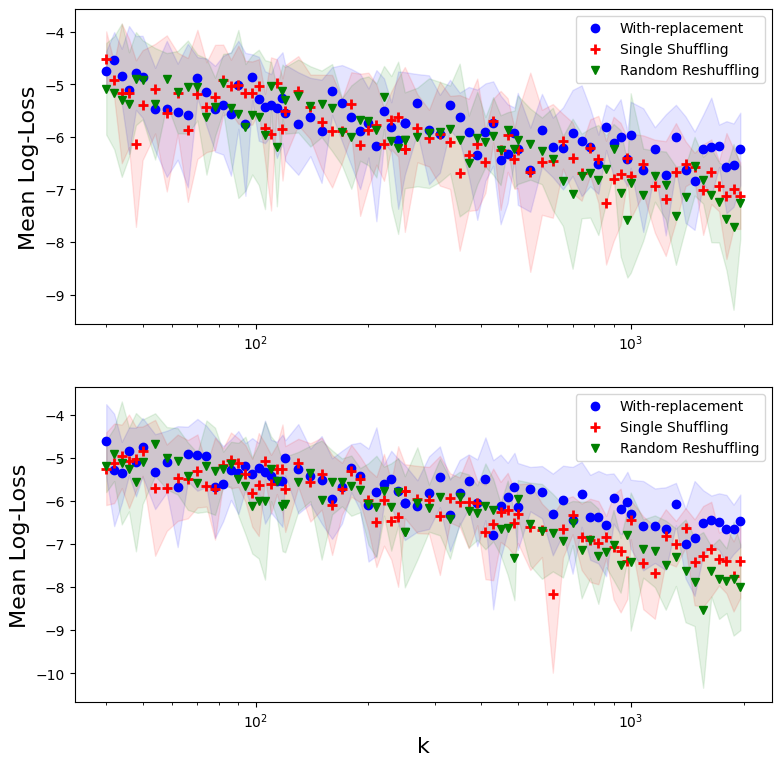

In [ ]:
# Runs the experiment setup as described in the paper in Sec. 5. The values of k below were chosen so that the graph has
# roughly equal density when the x axis is presented in log scale. To quickly run an experiment, change the value of
# 'times' which controls the number of SGD instantiations to average over, to a smaller number.

k_values = np.append(np.append(np.append(np.append(np.append(range(40, 49, 2), range(50, 121, 4)), range(120, 251, 10)),
                                         range(250, 501, 20)), range(500, 1001, 40)), range(1000, 2001, 80))
run_experiment(times=1, n=5, ks=k_values, G=1, lam=1, lam_max=200, setup='ss')
run_experiment(times=1, n=5, ks=k_values, G=1, lam=1, lam_max=200, setup='rr')
plot_graph(ks=k_values)

Loaded file 'ss k=40.p' containing 10 instantiations of SGD
Loaded file 'ss k=42.p' containing 10 instantiations of SGD
Loaded file 'ss k=44.p' containing 10 instantiations of SGD
Loaded file 'ss k=46.p' containing 10 instantiations of SGD
Loaded file 'ss k=48.p' containing 10 instantiations of SGD
Loaded file 'ss k=50.p' containing 10 instantiations of SGD
Loaded file 'ss k=54.p' containing 10 instantiations of SGD
Loaded file 'ss k=58.p' containing 10 instantiations of SGD
Loaded file 'ss k=62.p' containing 10 instantiations of SGD
Loaded file 'ss k=66.p' containing 10 instantiations of SGD
Loaded file 'ss k=70.p' containing 10 instantiations of SGD
Loaded file 'ss k=74.p' containing 10 instantiations of SGD
Loaded file 'ss k=78.p' containing 10 instantiations of SGD
Loaded file 'ss k=82.p' containing 10 instantiations of SGD
Loaded file 'ss k=86.p' containing 10 instantiations of SGD
Loaded file 'ss k=90.p' containing 10 instantiations of SGD
Loaded file 'ss k=94.p' containing 10 in

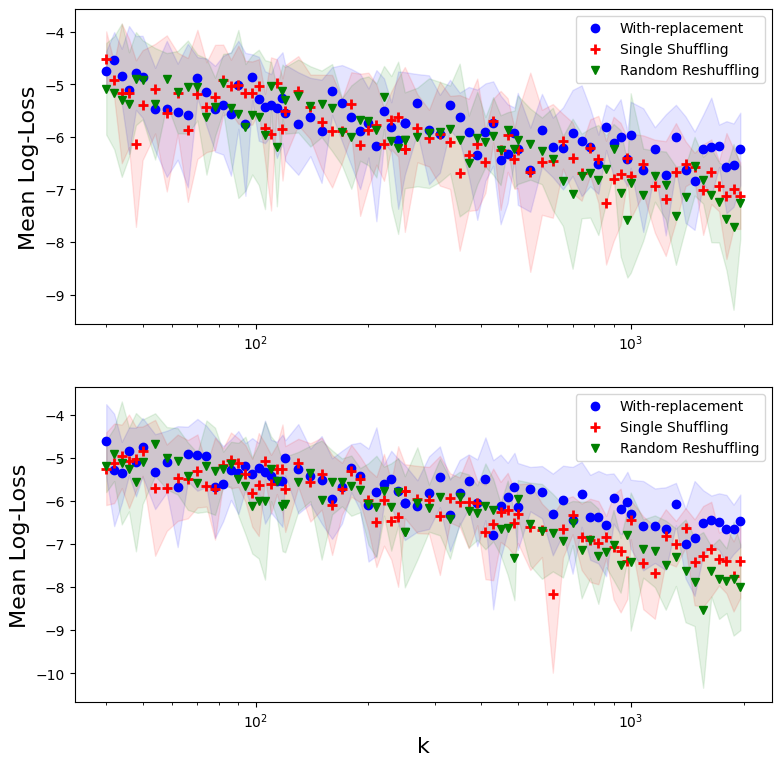

In [ ]:
# Runs the experiment setup as described in the paper in Sec. 5. The values of k below were chosen so that the graph has
# roughly equal density when the x axis is presented in log scale. To quickly run an experiment, change the value of
# 'times' which controls the number of SGD instantiations to average over, to a smaller number.

k_values = np.append(np.append(np.append(np.append(np.append(range(40, 49, 2), range(50, 121, 4)), range(120, 251, 10)),
                                         range(250, 501, 20)), range(500, 1001, 40)), range(1000, 2001, 80))
run_experiment(times=10, n=5, ks=k_values, G=1, lam=1, lam_max=200, setup='ss')
run_experiment(times=10, n=5, ks=k_values, G=1, lam=1, lam_max=200, setup='rr')
plot_graph(ks=k_values)

Loaded file 'ss k=40.p' containing 10 instantiations of SGD
Loaded file 'ss k=42.p' containing 10 instantiations of SGD
Loaded file 'ss k=44.p' containing 10 instantiations of SGD
Loaded file 'ss k=46.p' containing 10 instantiations of SGD
Loaded file 'ss k=48.p' containing 10 instantiations of SGD
Loaded file 'ss k=50.p' containing 10 instantiations of SGD
Loaded file 'ss k=54.p' containing 10 instantiations of SGD
Loaded file 'ss k=58.p' containing 10 instantiations of SGD
Loaded file 'ss k=62.p' containing 10 instantiations of SGD
Loaded file 'ss k=66.p' containing 10 instantiations of SGD
Loaded file 'ss k=70.p' containing 10 instantiations of SGD
Loaded file 'ss k=74.p' containing 10 instantiations of SGD
Loaded file 'ss k=78.p' containing 10 instantiations of SGD
Loaded file 'ss k=82.p' containing 10 instantiations of SGD
Loaded file 'ss k=86.p' containing 10 instantiations of SGD
Loaded file 'ss k=90.p' containing 10 instantiations of SGD
Loaded file 'ss k=94.p' containing 10 in

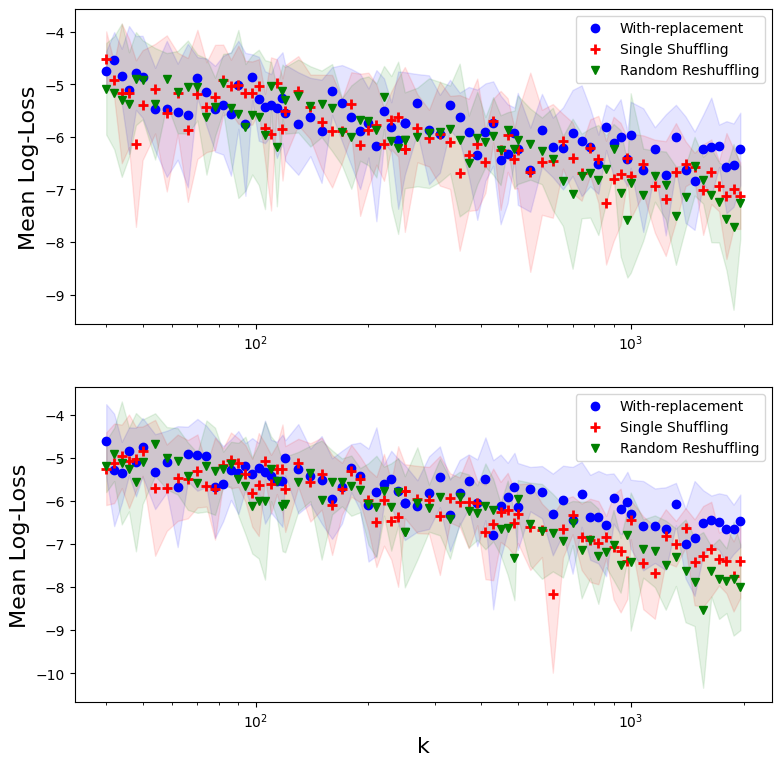

In [ ]:
# Runs the experiment setup as described in the paper in Sec. 5. The values of k below were chosen so that the graph has
# roughly equal density when the x axis is presented in log scale. To quickly run an experiment, change the value of
# 'times' which controls the number of SGD instantiations to average over, to a smaller number.

k_values = np.append(np.append(np.append(np.append(np.append(range(40, 49, 2), range(50, 121, 4)), range(120, 251, 10)),
                                         range(250, 501, 20)), range(500, 1001, 40)), range(1000, 2001, 80))
run_experiment(times=10, n=100, ks=k_values, G=1, lam=1, lam_max=200, setup='ss')
run_experiment(times=10, n=100, ks=k_values, G=1, lam=1, lam_max=200, setup='rr')
plot_graph(ks=k_values)

In [ ]:
# Run 'times'-many instantiations of SGD for all five sampling methods, and average over the results.
# Stores the results in a pickled file for each value of k and construction type (Eq. (1) or Eq. (2)).
def run_experiment2(times, n, ks, G, lam, lam_max, batch_size, setup='ss'):
    for i in range(len(ks)):
        try:
            result = pickle.load(open(setup + " k=" + str(ks[i]) + ".p", "rb"))
            print("Loaded file '" + str(setup) + " k=" + str(ks[i]) + ".p' containing " + str(len(result[0])) + " instantiations of SGD")
        except (OSError, IOError) as e:
            # Initialize 5 empty arrays: for with_replacement, SS, RR, cyclic_SGD, mini_batch_SGD
            result = [np.array([]), np.array([]), np.array([]), np.array([]), np.array([])]
            pickle.dump(result, open(str(setup) + " k=" + str(ks[i]) + ".p", "wb"))
            print("Created file '" + str(setup) + " k=" + str(ks[i]) + ".p'")

    for t in range(times):
        print_flag = False
        for i in range(len(ks)):
            result = pickle.load(open(setup + " k=" + str(ks[i]) + ".p", "rb"))
            if len(result[0]) <= t:
                print_flag = True
                result[0] = np.append(result[0], with_replacement(n, ks[i], G, lam, lam_max, setup))
                result[1] = np.append(result[1], SS(n, ks[i], G, lam, lam_max, setup))
                result[2] = np.append(result[2], RR(n, ks[i], G, lam, lam_max, setup))
                result[3] = np.append(result[3], cyclic_SGD(n, ks[i], G, lam, lam_max, setup))
                result[4] = np.append(result[4], mini_batch_SGD(n, ks[i], G, lam, lam_max, batch_size, setup))
                pickle.dump(result, open(str(setup) + " k=" + str(ks[i]) + ".p", "wb"))
        if print_flag:
            print('Computed ' + str(t + 1) + ' instantiations of SGD')


In [ ]:
# Extract the results of the given values of k and problem setup (E.g. Eq. (1) or Eq. (2) in the paper)
# and store the results in arrays
def get_results2(ks, setup):
    wr = np.zeros((len(ks),))   # with-replacement SGD mean
    ss = np.zeros((len(ks),))   # single-shuffling SGD mean
    rr = np.zeros((len(ks),))   # random reshuffling SGD mean
    cyclic = np.zeros((len(ks),))  # deterministic cyclic SGD mean
    mini_batch = np.zeros((len(ks),))  # mini-batch SGD mean

    wr_ci = np.zeros((len(ks),))  # with-replacement SGD std
    ss_ci = np.zeros((len(ks),))  # single-shuffling SGD std
    rr_ci = np.zeros((len(ks),))  # random reshuffling SGD std
    cyclic_ci = np.zeros((len(ks),))  # deterministic cyclic SGD std
    mini_batch_ci = np.zeros((len(ks),))  # mini-batch SGD std

    for i in range(len(ks)):
        try:
            result = pickle.load(open(setup + " k=" + str(ks[i]) + ".p", "rb"))
        except (OSError, IOError) as e:
            print("Could not open file '" + setup + " k=" + str(ks[i]) + ".p'. File may not exist.")
            return 1

        wr[i] = np.mean(np.log10(result[0]))
        ss[i] = np.mean(np.log10(result[1]))
        rr[i] = np.mean(np.log10(result[2]))
        cyclic[i] = np.mean(np.log10(result[3]))
        mini_batch[i] = np.mean(np.log10(result[4]))

        wr_ci[i] = np.std(np.log10(result[0]))
        ss_ci[i] = np.std(np.log10(result[1]))
        rr_ci[i] = np.std(np.log10(result[2]))
        cyclic_ci[i] = np.std(np.log10(result[3]))
        mini_batch_ci[i] = np.std(np.log10(result[4]))

    # Return everything
    return wr, ss, rr, cyclic, mini_batch, wr_ci, ss_ci, rr_ci, cyclic_ci, mini_batch_ci


In [ ]:
# Plots the graph including all 5 SGD variants
def plot_graph2(ks):
    fig, axs = plt.subplots(2, 1)

    # Plot for setup='ss'
    [wr, ss, rr, cyclic, mini_batch, wr_ci, ss_ci, rr_ci, cyclic_ci, mini_batch_ci] = get_results2(ks, setup='ss')

    axs[0].plot(ks, wr, 'bo', label='With-replacement')
    axs[0].fill_between(ks, wr - wr_ci, wr + wr_ci, color='b', alpha=.1)

    axs[0].plot(ks, ss, 'r+', label='Single Shuffling', markersize=7, markeredgewidth=2)
    axs[0].fill_between(ks, ss - ss_ci, ss + ss_ci, color='r', alpha=.1)

    axs[0].plot(ks, rr, 'gv', label='Random Reshuffling')
    axs[0].fill_between(ks, rr - rr_ci, rr + rr_ci, color='g', alpha=.1)

    axs[0].plot(ks, cyclic, 'ms', label='Deterministic Cyclic', markersize=6)
    axs[0].fill_between(ks, cyclic - cyclic_ci, cyclic + cyclic_ci, color='m', alpha=.1)

    axs[0].plot(ks, mini_batch, 'kx', label='Mini-batch', markersize=7)
    axs[0].fill_between(ks, mini_batch - mini_batch_ci, mini_batch + mini_batch_ci, color='k', alpha=.1)

    axs[0].set_ylabel("Mean Log-Loss", fontsize=16)
    axs[0].legend()
    axs[0].set_yscale('linear')
    axs[0].set_xscale('log')
    axs[0].set_title('Setup: Single Shuffling (ss)', fontsize=18)

    # Plot for setup='rr'
    [wr, ss, rr, cyclic, mini_batch, wr_ci, ss_ci, rr_ci, cyclic_ci, mini_batch_ci] = get_results2(ks, setup='rr')

    axs[1].plot(ks, wr, 'bo', label='With-replacement')
    axs[1].fill_between(ks, wr - wr_ci, wr + wr_ci, color='b', alpha=.1)

    axs[1].plot(ks, ss, 'r+', label='Single Shuffling', markersize=7, markeredgewidth=2)
    axs[1].fill_between(ks, ss - ss_ci, ss + ss_ci, color='r', alpha=.1)

    axs[1].plot(ks, rr, 'gv', label='Random Reshuffling')
    axs[1].fill_between(ks, rr - rr_ci, rr + rr_ci, color='g', alpha=.1)

    axs[1].plot(ks, cyclic, 'ms', label='Deterministic Cyclic', markersize=6)
    axs[1].fill_between(ks, cyclic - cyclic_ci, cyclic + cyclic_ci, color='m', alpha=.1)

    axs[1].plot(ks, mini_batch, 'kx', label='Mini-batch', markersize=7)
    axs[1].fill_between(ks, mini_batch - mini_batch_ci, mini_batch + mini_batch_ci, color='k', alpha=.1)

    axs[1].set_ylabel("Mean Log-Loss", fontsize=16)
    axs[1].set_xlabel("k", fontsize=16)
    axs[1].legend()
    axs[1].set_yscale('linear')
    axs[1].set_xscale('log')
    axs[1].set_title('Setup: Random Reshuffling (rr)', fontsize=18)

    fig.set_size_inches(10, 10)
    fig.tight_layout()
    plt.show()


In [ ]:
# Runs the experiment setup as described in the paper in Sec. 5. The values of k below were chosen so that the graph has
# roughly equal density when the x axis is presented in log scale. To quickly run an experiment, change the value of
# 'times' which controls the number of SGD instantiations to average over, to a smaller number.

import numpy as np

k_values = np.append(
    np.append(
        np.append(
            np.append(
                np.append(
                    range(40, 49, 2),  # First range
                    range(50, 121, 4)  # Second range
                ),
                range(120, 251, 10)  # Third range
            ),
            range(250, 501, 20)  # Fourth range
        ),
        range(500, 1001, 40)  # Fifth range
    ),
    range(1000, 2001, 80)  # Sixth range
)

run_experiment2(times=1, n=10, ks=k_values, G=1, lam=1, lam_max=200,batch_size=32, setup='ss')
run_experiment2(times=1, n=10, ks=k_values, G=1, lam=1, lam_max=200,batch_size=32, setup='rr')
plot_graph2(ks=k_values)

Loaded file 'ss k=40.p' containing 1 instantiations of SGD
Loaded file 'ss k=42.p' containing 1 instantiations of SGD
Loaded file 'ss k=44.p' containing 1 instantiations of SGD
Loaded file 'ss k=46.p' containing 1 instantiations of SGD
Loaded file 'ss k=48.p' containing 1 instantiations of SGD
Loaded file 'ss k=50.p' containing 1 instantiations of SGD
Loaded file 'ss k=54.p' containing 1 instantiations of SGD
Loaded file 'ss k=58.p' containing 1 instantiations of SGD
Loaded file 'ss k=62.p' containing 1 instantiations of SGD
Loaded file 'ss k=66.p' containing 1 instantiations of SGD
Loaded file 'ss k=70.p' containing 1 instantiations of SGD
Loaded file 'ss k=74.p' containing 1 instantiations of SGD
Loaded file 'ss k=78.p' containing 1 instantiations of SGD
Loaded file 'ss k=82.p' containing 1 instantiations of SGD
Loaded file 'ss k=86.p' containing 1 instantiations of SGD
Loaded file 'ss k=90.p' containing 1 instantiations of SGD
Loaded file 'ss k=94.p' containing 1 instantiations of S

IndexError: list index out of range